In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import time

In [4]:
df= pd.read_csv(r"C:\Users\danie\OneDrive\Documentos\Cursos\python_ds_linkedin\base_datos_2008.csv")
df2 = df[df["Origin"].isin(["ATL","HOU","IND"])]
df = df.head(100000)

En el DF original tenemos datos acerca del mes, año y día de los vuelos en columnas separadas. 
El siguiente código crea una lista extrayendo de cada fila del dataframe original el año, mes y día y creando un solo valor de cada uno de estos. Para luego agregar una sola columna con todos estos datos para cada vuelo.

In [6]:
times = []
for i in np.arange(len(df)):
    times.append(datetime.datetime(year = 2008, month = df.loc[i,"Month"], day = df.loc[i,"DayofMonth"]))

In [8]:
times[99000]

datetime.datetime(2008, 1, 16, 0, 0)

Añadimos una columna al dataframe

In [9]:
df["Time"]= times

Ahora agruparemos los datos por el tiempo. la fecha no será el index de la tabla. Además quiero que me muestre la columna deepdelay y arrdelay

In [11]:
data = df.groupby(by=["Time"], as_index= False)["DepDelay","ArrDelay"].mean()
data.head()

<ipython-input-11-ead8f0246d3a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby(by=["Time"], as_index= False)["DepDelay","ArrDelay"].mean()


,Time,DepDelay,ArrDelay
0,2008-01-01,13.074074,6.936508
1,2008-01-02,13.234043,8.159574
2,2008-01-03,25.289861,20.432153
3,2008-01-04,18.493897,14.235814
4,2008-01-05,23.172296,19.265662


C:\Users\danie\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Time', ylabel='DepDelay'>

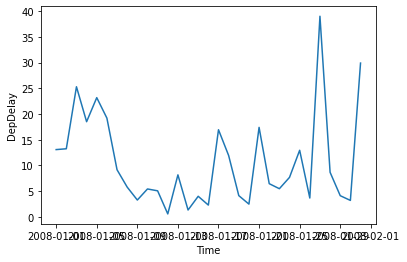

In [14]:
sns.lineplot(data["Time"], data["DepDelay"])

Ahora cambiaremos el Index a el Tiempo

In [15]:
data = df.groupby(by=["Time"])["DepDelay","ArrDelay"].mean()
data.head()

<ipython-input-15-6f5686dfc3c8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data = df.groupby(by=["Time"])["DepDelay","ArrDelay"].mean()


,DepDelay,ArrDelay
Time,,
2008-01-01,13.074074,6.936508
2008-01-02,13.234043,8.159574
2008-01-03,25.289861,20.432153
2008-01-04,18.493897,14.235814
2008-01-05,23.172296,19.265662


<AxesSubplot:xlabel='Time'>

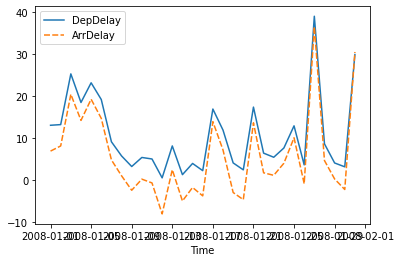

In [16]:
sns.lineplot(data = data)

Con df2 tenemos lo siguiente

In [17]:
times = []
for i in df2.index:
    times.append(datetime.datetime(year = 2008, month = df2.loc[i,"Month"], day = df2.loc[i,"DayofMonth"]))
    
df2["Time"]= times

<AxesSubplot:xlabel='Time', ylabel='ArrDelay'>

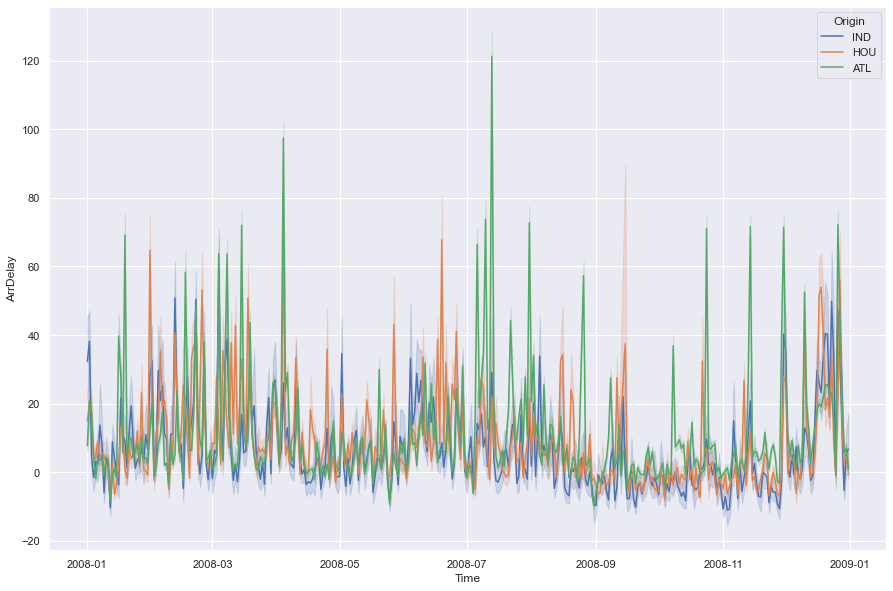

In [18]:
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(x="Time", y="ArrDelay", hue="Origin", data = df2)